# Car Price Prediction
This notebook details the development of a machine learning model to predict car prices for Chaky's company. 

### 1. Importing libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.1', '2.2.3', '0.13.2', '3.10.0')

### 2. Load data

In [3]:
# loading the data
df = pd.read_csv("../data/Cars.csv")

In [4]:
# 
df.shape

(8128, 13)

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# understanding the data types & non-null values of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# understanding the min and max values of the columns
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# getting all the unique values of  the owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [9]:
# mapping the owner values to 1,2,3,4,5 since it's not possible with label encoding
df['owner'] = df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], [1, 2, 3, 4, 5])


In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
# understanding the unique values of fuel columm
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [12]:
# removing all rows with CNG and LPG because CNG and LPG use a different mileage sytem
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [13]:
df.shape

(8033, 13)

In [14]:
# removing “kmpl” and converting column as float
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [15]:
# removing "CC" and converting column as float
df['engine'] = df['engine'].str.split(' ').str[0].astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
# removing "bhp" and converting column as float
df['max_power'] = df['max_power'].str.split(' ').str[0].astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [17]:
# taking only the brand name and removing the rest
df['name'] = df['name'].str.split().str[0]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
# not sure how torque works so doing as chaky says
df.drop(columns=['torque'], inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [19]:
# checking selling price of Test Drive Cars to make sure 
df[df['owner'] == 5]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen,2019,1350000,5400,Diesel,Dealer,Manual,5,22.27,1498.0,108.60,5.0
4950,Audi,2019,6223000,7800,Petrol,Dealer,Automatic,5,15.26,1798.0,187.74,5.0
4951,Audi,2019,5923000,11500,Petrol,Dealer,Automatic,5,15.26,1798.0,187.74,5.0
4952,Audi,2019,6523000,23600,Petrol,Dealer,Automatic,5,15.26,1798.0,187.74,5.0
6220,Honda,2019,2000000,24857,Petrol,Dealer,Automatic,5,16.50,1799.0,139.46,5.0


In [20]:
# deleting samples for test drive cars
df = df[df['owner'] != 5]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [21]:
df.fuel.unique(), df.seller_type.unique(), df.transmission.unique()

(array(['Diesel', 'Petrol'], dtype=object),
 array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object))

In [22]:
# performing label encoding of the seller_type, fuel and transmission
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])


In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


### 3. EDA (Exploratory Data Analysis)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 815.3+ KB


In [25]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

#### 3.1 Univariate Analysis

**Histogram**

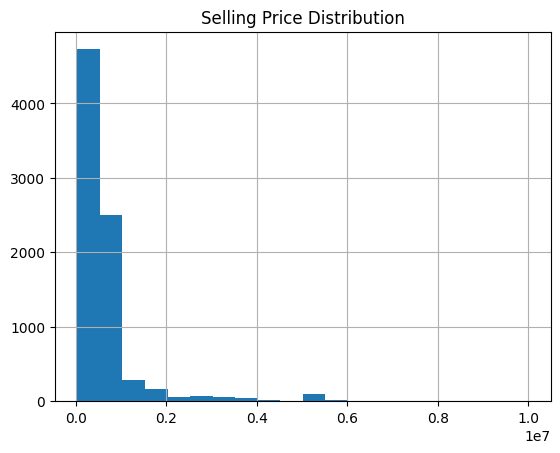

In [26]:
df['selling_price'].hist(bins=20)
plt.title('Selling Price Distribution')
plt.show()


**Boxplot**

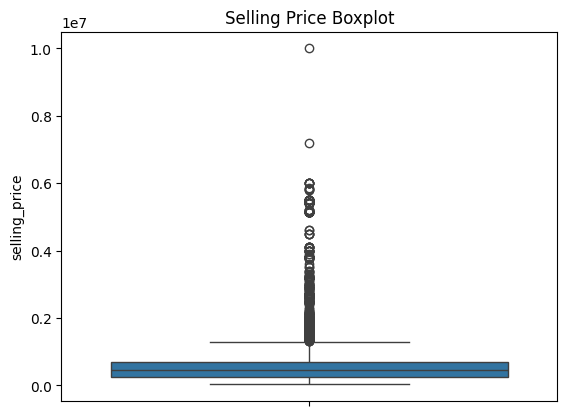

In [27]:
# to find out any outliers, using boxplot to identify them
sns.boxplot(df['selling_price'])
plt.title('Selling Price Boxplot')
plt.show()


**Distribution Plot**

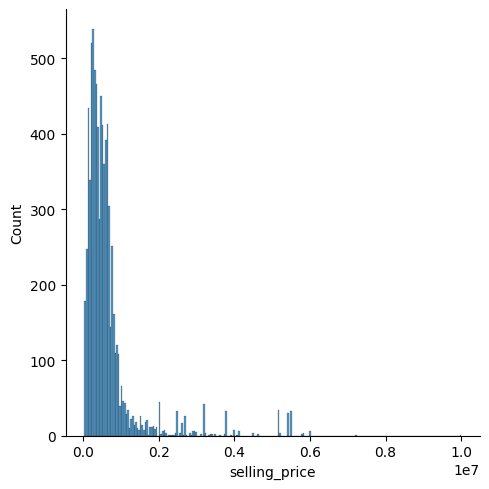

In [28]:
#distribution plot
sns.displot(data = df, x = 'selling_price')

**Correlation Matrix**

In [29]:
dfcopy = df.copy()
dfcopy.drop(['name'], axis='columns', inplace=True)

<Axes: >

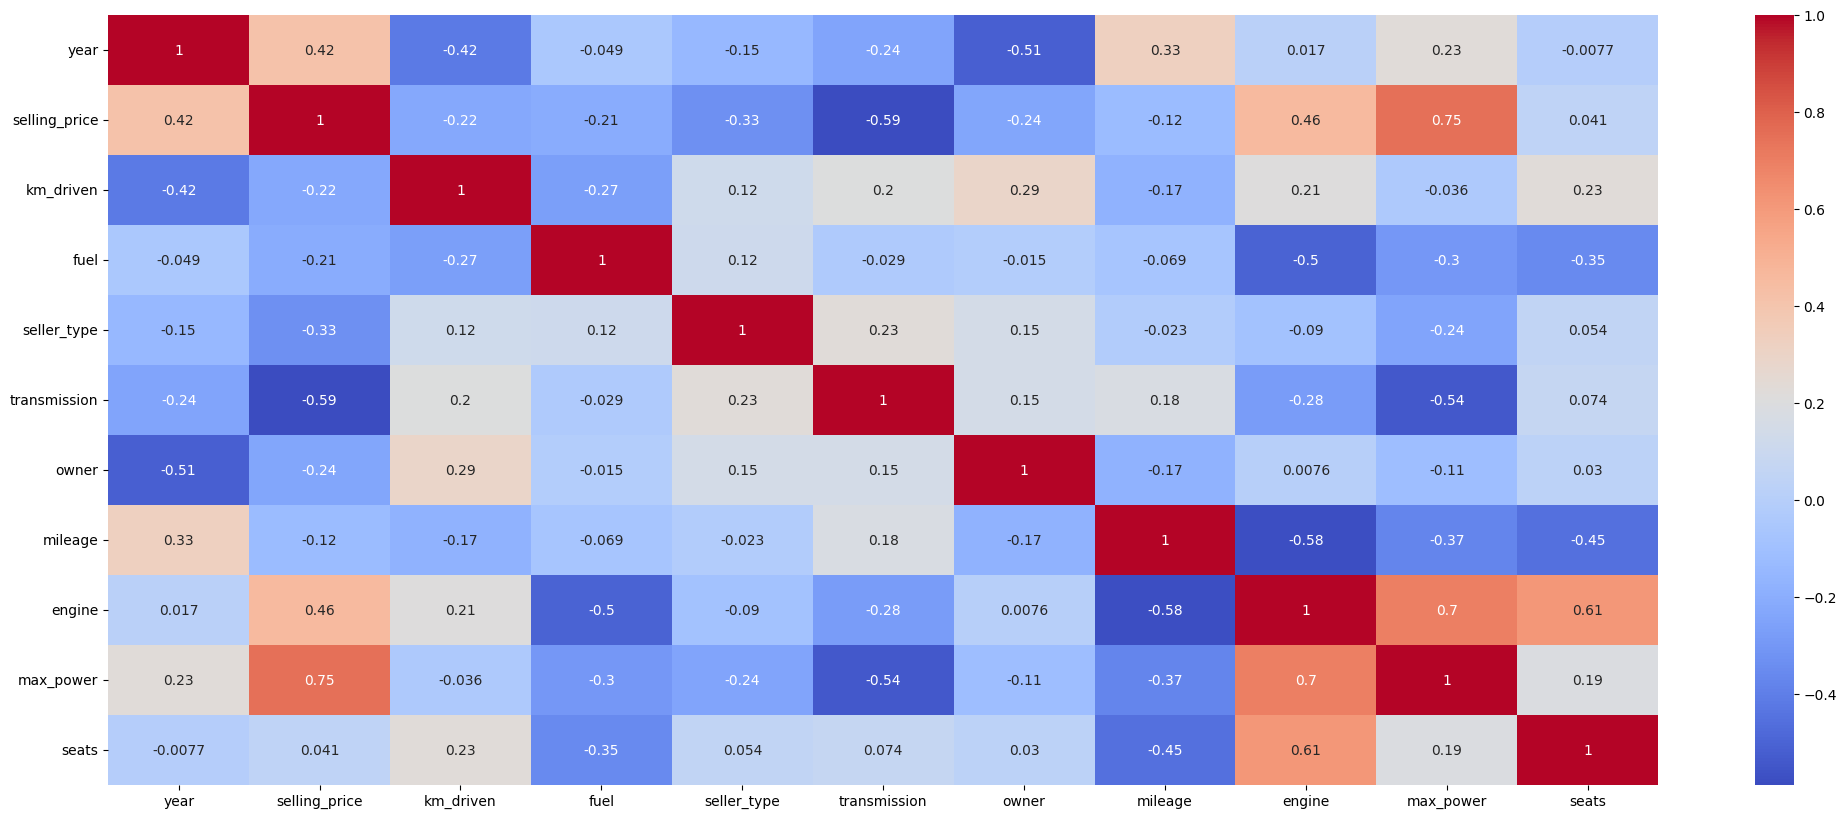

In [30]:
#correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(dfcopy.corr(), annot=True, cmap='coolwarm')

### 4. Feature Selection

In [31]:
# from the correlation matrix, we can see that mileage, engine, year and max_power have the highest correlation
X = df[['engine', 'max_power', 'mileage', 'year']]

# since selling price is our y and is a big number, we transform using log transform
y = np.log(df['selling_price'])
X.shape, y.shape

((8028, 4), (8028,))

In [32]:
y.head

<bound method NDFrame.head of 0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64>

In [33]:
# check null or missing values for our features
X.isnull().sum()

engine       214
max_power    208
mileage      214
year           0
dtype: int64

#### Train Test Split

In [ ]:
# splitting the data using train_test_split before adding the missing/null values
# i have splited the data in 80/20 ratio, 80 for training and 20 for testing

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6422, 4), (1606, 4), (6422,), (1606,))

### 5. Preprocessing

In [35]:
# chekcing null values in the X_train data 
X_train.isnull().sum()

engine       171
max_power    165
mileage      171
year           0
dtype: int64

In [36]:
# chekcing null values in the X_test data 
X_test.isnull().sum()

engine       43
max_power    43
mileage      43
year          0
dtype: int64

<Axes: xlabel='engine', ylabel='Count'>

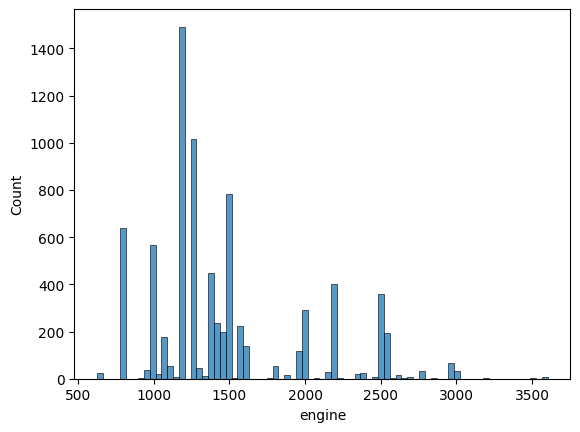

In [37]:
# checking the skewness of the features to fill in the null values using histplot

sns.histplot(data=df, x='engine')


In [38]:
# from the diagram above, it is a positively skewed distribution. To confirm it, we use scipy.stats
from scipy.stats import skew

skewness = skew(df['engine'].dropna())
print(f"Skewness: {skewness}")

Skewness: 1.1253113204700755


<Axes: xlabel='year', ylabel='Count'>

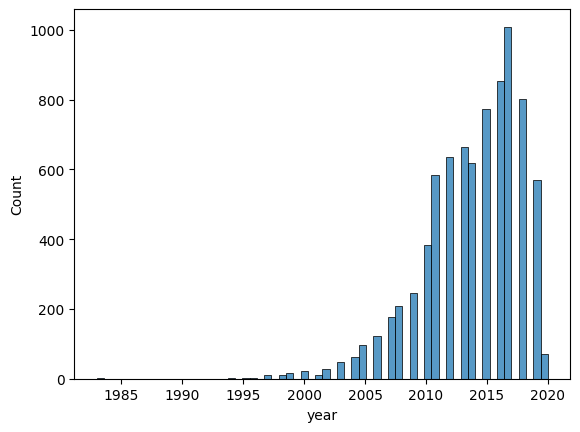

In [39]:
sns.histplot(data=df, x='year')

<Axes: xlabel='mileage', ylabel='Count'>

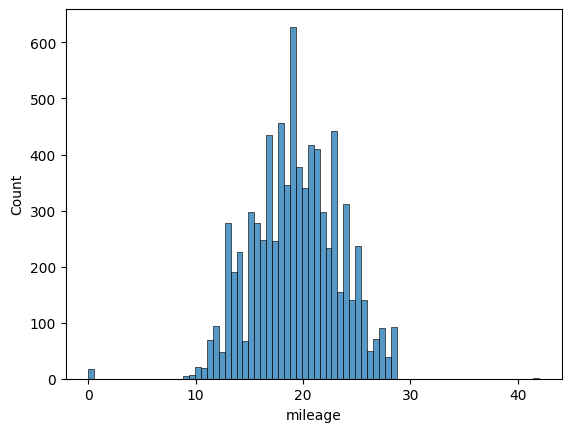

In [40]:
sns.histplot(data=df, x='mileage')

In [41]:
# from the diagram, it is an almost normal but slightly negative skew as we have few data near 0
from scipy.stats import skew

skewness = skew(df['mileage'].dropna())
print(f"Skewness: {skewness}")


Skewness: -0.17324819807259195


<Axes: xlabel='max_power', ylabel='Count'>

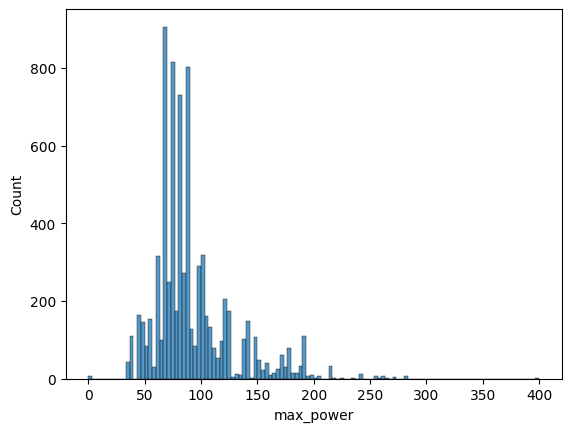

In [42]:
sns.histplot(data=df, x='max_power')

In [43]:
# from the diagram above, it is a positively skewed distribution.
skewness = skew(df['max_power'].dropna())
print(f"Skewness: {skewness}")

Skewness: 1.6196610207802749


In [44]:
# after analysis of the graph, we fill the missing values with median for the columns

# filling missing values in X_train with its median
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

# filling missing values in X_test with the median of X_train
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)


In [45]:
X_train['engine'].median(), X_train['mileage'].median(), X_train['max_power'].median()

(np.float64(1248.0), np.float64(19.3), np.float64(82.85))

In [46]:
# check for missing values
X_train.isnull().sum(), X_test.isnull().sum(), y_train.isnull().sum(), y_test.isnull().sum()

(engine       0
 max_power    0
 mileage      0
 year         0
 dtype: int64,
 engine       0
 max_power    0
 mileage      0
 year         0
 dtype: int64,
 np.int64(0),
 np.int64(0))

In [47]:
# we need to ensure that the number of samples in the feature matrices (X_train, X_test) matches
assert(X_test.shape[0] == y_test.shape[0])

In [48]:
assert(X_train.shape[0] == y_train.shape[0])

In [49]:
X_train

,engine,max_power,mileage,year
2982,799.0,53.30,25.17,2016
2430,796.0,47.30,22.74,2013
6294,1248.0,82.85,19.30,2009
6255,2179.0,153.86,17.60,2018
4253,1998.0,68.00,14.80,1999
...,...,...,...,...
5293,1197.0,78.90,20.36,2013
5461,998.0,67.04,20.51,2016
865,1248.0,88.76,20.77,2015
7701,2487.0,214.56,22.37,2019


In [50]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.4,1248.0,74.0,5.0


#### Scaling

In [51]:
# to ensure faster convergence, we scale the features usint StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


array([-1.31641621, -1.08821485,  1.45915602,  0.53920896])

In [ ]:
# saving scaler model for the webapp
import joblib
joblib.dump(scaler, "../app/model/scaler.dump")

### 6. Model Selection w Cross Validation


In [52]:
# defining three models to compare model performance

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

algorithms = [LinearRegression(), SVR(), RandomForestRegressor()]

algorithms_name = ['LinearRegression', 'SVR', 'RandomForestRegressor']

In [53]:
# cross validation
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse  = []

kfold = KFold(n_splits = 5, shuffle=True)
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithms_name[i]}: Score: {scores}; Mean: {scores.mean()}")

LinearRegression: Score: [-0.11073142 -0.11419095 -0.10393271 -0.09394175 -0.10456345]; Mean: -0.10547205685736136


SVR: Score: [-0.07655636 -0.0757455  -0.07197141 -0.07727922 -0.07069721]; Mean: -0.0744499422814926
RandomForestRegressor: Score: [-0.05237367 -0.05361107 -0.05168409 -0.05280352 -0.04953617]; Mean: -0.05200170362327585


As Random Forest Regressor has the Mean closest to 0, it is the best performer among the 3. Now we use GridSearch to fine-tune the hyper parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 
              'n_estimators': [5, 6, 7, 8, 9, 10]}

rf = RandomForestRegressor(random_state=1)

grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=kfold,
                    n_jobs=-1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 10}

In [56]:
best_mse = grid.best_score_

In [57]:
# best mse from the gridsearch
best_mse

np.float64(-0.0540575711550931)

### 6. Testing

In [58]:
# we use the best model to test the dataset
from sklearn.metrics import mean_squared_error, r2_score
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.04842009978558329

In [59]:
r2_score(y_test, yhat)

0.9320077436821734

### 8. Analysis

Higher feature importance scores mean a feature has a bigger impact on predictions.

In [60]:
rf = grid.best_estimator_

In [61]:
rf.feature_importances_

array([0.06133512, 0.44049057, 0.03423682, 0.46393749])

Text(0.5, 0, 'Random Forest Feature Importance')

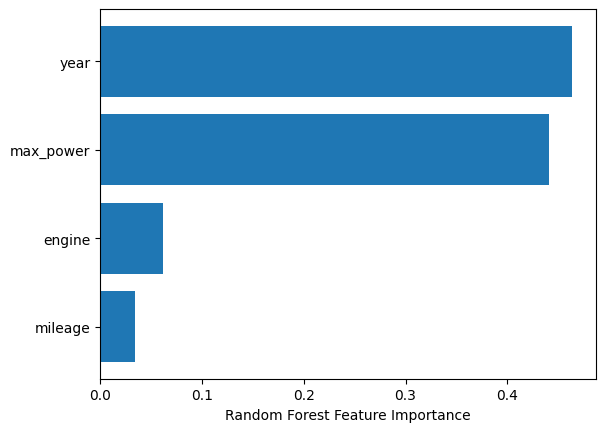

In [63]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Looking at the graph, we can see that year and max power is very important in predicting the car price.

### 9. Inference

Now we save our model

In [64]:
# save model using pickle
import pickle

filename = '../app/model/a1_car_price.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [65]:
# save model for the webapp to use
loaded_model = pickle.load(open(filename, 'rb'))

In [66]:
# trying some prediction 
sample = X_train[4:5]
pred_selling_price = loaded_model.predict(sample)

np.exp(pred_selling_price)

array([150978.67609912])

# Analysis and Report


- Which features significantly impact predictions, and which do not? Why?
- Which algorithms performed well, and which did not? Why? (Although you have not studied algorithms in depth yet, you can explore online resources to develop an intuition.)